In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import taxopy

In [42]:
samples = ["CX113C","CX113E","CX113F","CX113H","CX115H","CX1138","Neige_2_3","Neige_3_2","Neige_4"]
taxa = ["Bear", "Bear", "Wolf", "Wolf", "Bear", "Bear", "Wolf", "Wolf", "Wolf"]

In [46]:
df_all = pd.DataFrame(columns=["unclassified", "Canislupusfamiliaris", "Ursusarctos", "Homosapiens", "Bacteria", "Archaea"])

for i in range(len(samples)):
    df=pd.read_csv(f"./data/kraken_report/centrifuge_kreport.{samples[i]}.out", sep='\t', header=None)
    #remove leading spaces
    df[5] = df[5].str.replace(' ', '')
    #keep only superkingdoms
    filtered_df = df[(df[3].isin(["D", "U"])) & (df[0] > 0)]
    # Remove the row where column 5 is "Eukaryota"
    filtered_df = filtered_df[filtered_df[5] != "Eukaryota"]
    # Add rows where column 5 is "Canis lupus familiaris", "Ursus arctos" or "Homo sapiens"
    new_rows = df[df[5].isin([
        "Canislupusfamiliaris",
        "Ursusarctos",
        "Homosapiens"])]

    filtered_df = pd.concat([filtered_df, new_rows])

    for name in df_all.columns:
        if name in filtered_df[5].values:
            df_all.loc[i, name] = filtered_df[filtered_df[5] == name][0].values[0]
        else:
            df_all.loc[i, name] = 0

df_all

,unclassified,Canislupusfamiliaris,Ursusarctos,Homosapiens,Bacteria,Archaea
0,41.38,0.97,0.52,0.25,55.96,0.4
1,46.39,0.4,0.7,0.27,51.31,0.46
2,39.54,1.2,0.17,0.2,57.97,0.42
3,36.93,0.98,0.11,0.11,60.92,0.47
4,47.64,0.52,0.25,0.31,50.22,0.48
5,45.88,0.48,1.56,0.4,50.67,0.48
6,19.57,64.49,0.14,0.15,14.44,0.12
7,45.79,1.04,0.2,0.26,51.89,0.36
8,38.37,0.93,0.16,0.18,59.7,0.28


In [47]:
# Insert a blank row below row 3
df_all.loc[3.5] = [None] * df_all.shape[1]
df_all = df_all.sort_index().reset_index(drop=True)
df_all

,unclassified,Canislupusfamiliaris,Ursusarctos,Homosapiens,Bacteria,Archaea
0,41.38,0.97,0.52,0.25,55.96,0.4
1,46.39,0.4,0.7,0.27,51.31,0.46
2,39.54,1.2,0.17,0.2,57.97,0.42
3,36.93,0.98,0.11,0.11,60.92,0.47
4,None,None,None,None,None,None
5,47.64,0.52,0.25,0.31,50.22,0.48
6,45.88,0.48,1.56,0.4,50.67,0.48
7,19.57,64.49,0.14,0.15,14.44,0.12
8,45.79,1.04,0.2,0.26,51.89,0.36
9,38.37,0.93,0.16,0.18,59.7,0.28


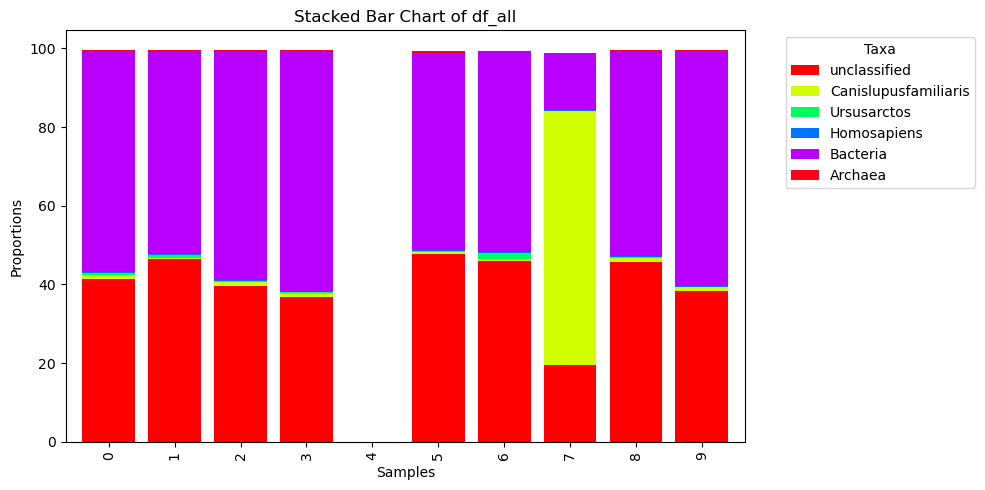

In [48]:
# Adjust the bar width and height
bar_width = 0.8
bar_height = 0.5

# Plot the stacked bar chart with adjusted bar width and height
ax = df_all.plot(kind='bar', stacked=True, figsize=(10, 5), width=bar_width, colormap='hsv')

# Set the labels and title
ax.set_xlabel('Samples')
ax.set_ylabel('Proportions')
ax.set_title('Stacked Bar Chart of df_all')

# Show the legend
ax.legend(title='Taxa', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

In [49]:
samples_forplot = ["CX113C","CX113E","CX113F","CX113H", "", "CX115H","CX1138","Neige_2_3","Neige_3_2","Neige_4"]

In [50]:
df_all.rename(columns={
    'Canislupusfamiliaris': 'Canis familiaris',
    'Ursusarctos': 'Ursus arctos',
    'Homosapiens': 'Homo sapiens',
    'unclassified': 'Unclassified'
}, inplace=True)
df_all

,Unclassified,Canis familiaris,Ursus arctos,Homo sapiens,Bacteria,Archaea
0,41.38,0.97,0.52,0.25,55.96,0.4
1,46.39,0.4,0.7,0.27,51.31,0.46
2,39.54,1.2,0.17,0.2,57.97,0.42
3,36.93,0.98,0.11,0.11,60.92,0.47
4,None,None,None,None,None,None
5,47.64,0.52,0.25,0.31,50.22,0.48
6,45.88,0.48,1.56,0.4,50.67,0.48
7,19.57,64.49,0.14,0.15,14.44,0.12
8,45.79,1.04,0.2,0.26,51.89,0.36
9,38.37,0.93,0.16,0.18,59.7,0.28


In [54]:
# Convert the dataframe to numeric values for summation
df_all_numeric = df_all.apply(pd.to_numeric, errors='coerce')

# Loop through the rows and sum them
row_sums = df_all_numeric.sum(axis=1)

# Print the sums
print(row_sums)

0    99.48
1    99.53
2    99.50
3    99.52
4     0.00
5    99.42
6    99.47
7    98.91
8    99.54
9    99.62
dtype: float64


In [51]:
colour_dict = {
    'Unclassified': 'darkgray',
    'Canis familiaris': 'steelblue',
    'Ursus arctos': 'indianred',
    'Homo sapiens': 'forestgreen',
    'Bacteria': 'darkorchid',
    'Archaea': 'gold'
}

colour_dict

{'Unclassified': 'darkgray',
 'Canis familiaris': 'steelblue',
 'Ursus arctos': 'indianred',
 'Homo sapiens': 'forestgreen',
 'Bacteria': 'darkorchid',
 'Archaea': 'gold'}

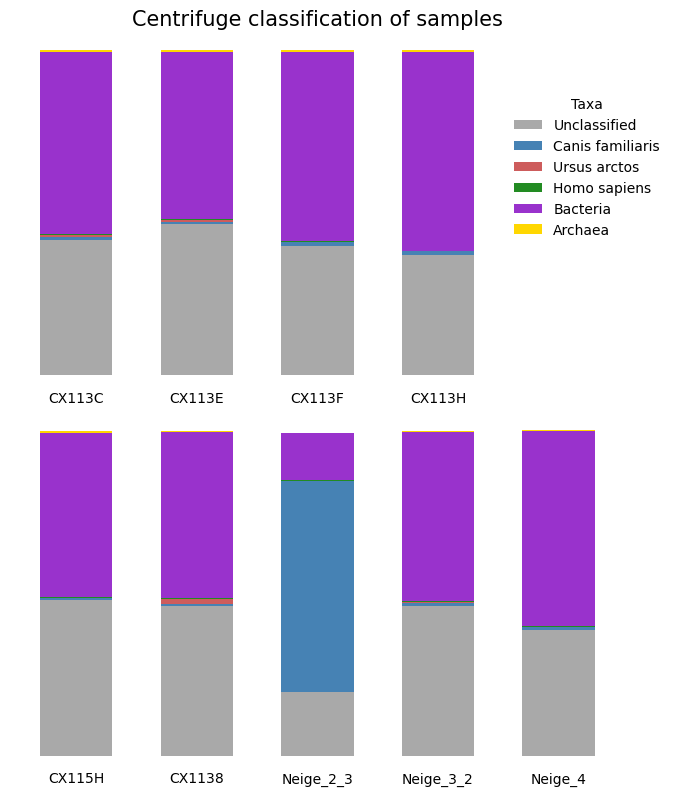

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(7, 8))
plt.subplots_adjust(hspace=1)
bar_width1 = 0.6

# Plot the first 4 rows of df_all in the top subplot
df_all.iloc[:5].plot(kind='bar', stacked=True, ax=ax[0], width=bar_width1, color=[colour_dict[col] for col in df_all.columns])
ax[0].set_title('Centrifuge classification of samples', size=15)
ax[0].legend(title='Taxa', bbox_to_anchor=(0.8, 0.85), loc='upper left', frameon=False)


# Plot the last 5 rows of df_all in the bottom subplot
df_all.iloc[5:].plot(kind='bar', stacked=True, ax=ax[1], width=bar_width1, color=[colour_dict[col] for col in df_all.columns])
ax[1].legend().remove()

ax[0].axis('off')
ax[1].axis('off')

# Add text below each of the bars in both subplots
for i, rect in enumerate(ax[0].patches[0:5]):
    height = rect.get_height()
    ax[0].text(rect.get_x() + rect.get_width() / 2., -5, samples_forplot[i], ha='center', va='top')

for i, rect in enumerate(ax[1].patches[0:5]):
    height = rect.get_height()
    ax[1].text(rect.get_x() + rect.get_width() / 2., -5, samples_forplot[i + 5], ha='center', va='top')

# Remove the axes from both plots
# Adjust layout
plt.tight_layout()
plt.savefig('figures/cent_krep.png', dpi=600)
plt.show()

# Plots with controls

In [2]:
samples = ["CX113C","CX113E","CX113F","CX113H","CX115H","CX1138","Neige_2_3","Neige_3_2","Neige_4", "greek_wolf", "slov_bear", "human"]
taxa = ["Bear", "Bear", "Wolf", "Wolf", "Bear", "Bear", "Wolf", "Wolf", "Wolf", "Wolf", "Bear", "Human"]

In [3]:
df_all = pd.DataFrame(columns=["unclassified", "Canislupusfamiliaris", "Ursusarctos", "Homosapiens", "Bacteria", "Archaea"])

for i in range(len(samples)):
    df=pd.read_csv(f"./data/kraken_report/centrifuge_kreport.{samples[i]}.out", sep='\t', header=None)
    #remove leading spaces
    df[5] = df[5].str.replace(' ', '')
    #keep only superkingdoms
    filtered_df = df[(df[3].isin(["D", "U"])) & (df[0] > 0)]
    # Remove the row where column 5 is "Eukaryota"
    filtered_df = filtered_df[filtered_df[5] != "Eukaryota"]
    # Add rows where column 5 is "Canis lupus familiaris", "Ursus arctos" or "Homo sapiens"
    new_rows = df[df[5].isin([
        "Canislupusfamiliaris",
        "Ursusarctos",
        "Homosapiens"])]

    filtered_df = pd.concat([filtered_df, new_rows])

    for name in df_all.columns:
        if name in filtered_df[5].values:
            df_all.loc[i, name] = filtered_df[filtered_df[5] == name][0].values[0]
        else:
            df_all.loc[i, name] = 0

df_all

,unclassified,Canislupusfamiliaris,Ursusarctos,Homosapiens,Bacteria,Archaea
0,41.38,0.97,0.52,0.25,55.96,0.4
1,46.39,0.4,0.7,0.27,51.31,0.46
2,39.54,1.2,0.17,0.2,57.97,0.42
3,36.93,0.98,0.11,0.11,60.92,0.47
4,47.64,0.52,0.25,0.31,50.22,0.48
5,45.88,0.48,1.56,0.4,50.67,0.48
6,19.57,64.49,0.14,0.15,14.44,0.12
7,45.79,1.04,0.2,0.26,51.89,0.36
8,38.37,0.93,0.16,0.18,59.7,0.28
9,0.26,98.76,0.08,0.02,0.01,0


In [4]:
df_all.rename(columns={
    'Canislupusfamiliaris': 'Canis familiaris',
    'Ursusarctos': 'Ursus arctos',
    'Homosapiens': 'Homo sapiens',
    'unclassified': 'Unclassified'
}, inplace=True)
df_all

,Unclassified,Canis familiaris,Ursus arctos,Homo sapiens,Bacteria,Archaea
0,41.38,0.97,0.52,0.25,55.96,0.4
1,46.39,0.4,0.7,0.27,51.31,0.46
2,39.54,1.2,0.17,0.2,57.97,0.42
3,36.93,0.98,0.11,0.11,60.92,0.47
4,47.64,0.52,0.25,0.31,50.22,0.48
5,45.88,0.48,1.56,0.4,50.67,0.48
6,19.57,64.49,0.14,0.15,14.44,0.12
7,45.79,1.04,0.2,0.26,51.89,0.36
8,38.37,0.93,0.16,0.18,59.7,0.28
9,0.26,98.76,0.08,0.02,0.01,0


In [5]:
colour_dict = {
    'Unclassified': 'darkgray',
    'Canis familiaris': 'steelblue',
    'Ursus arctos': 'indianred',
    'Homo sapiens': 'forestgreen',
    'Bacteria': 'darkorchid',
    'Archaea': 'gold'
}

colour_dict

{'Unclassified': 'darkgray',
 'Canis familiaris': 'steelblue',
 'Ursus arctos': 'indianred',
 'Homo sapiens': 'forestgreen',
 'Bacteria': 'darkorchid',
 'Archaea': 'gold'}

In [8]:
samples_forplot = ["CX113C","CX113E","CX113F","CX113H", "CX115H","CX1138","Neige_2_3","Neige_3_2","Neige_4", "Wolf", "Bear", "Human"]

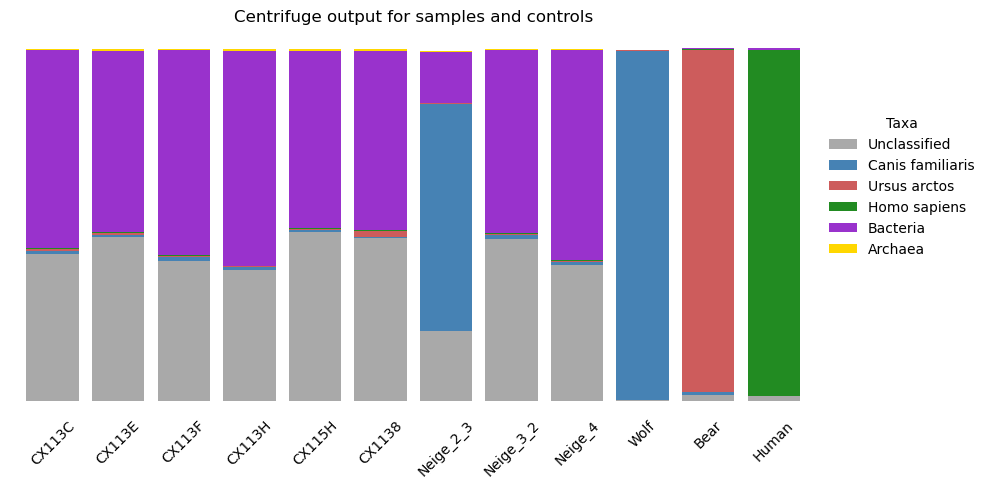

In [10]:
# Adjust the bar width and height
bar_width = 0.8
bar_height = 0.5

# Plot the stacked bar chart with adjusted bar width and height
ax = df_all.plot(kind='bar', stacked=True, figsize=(10, 5), width=bar_width, color=[colour_dict[col] for col in df_all.columns])

# Set the labels and title
ax.set_xlabel('Samples')
ax.set_ylabel('Proportions')
ax.set_title('Centrifuge output for samples and controls')
ax.axis('off')

# Show the legend
ax.legend(title='Taxa', bbox_to_anchor=(1, 0.8), loc='upper left', frameon=False)


for i, rect in enumerate(ax.patches[0:12]):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2., -5, samples_forplot[i], ha='center', va='top', rotation=45)

# Show the plot
plt.tight_layout()
plt.savefig('figures/cent_krep_2.png', dpi=600)
plt.show()